### 决策树模型训练

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


#导入数据
iris = datasets.load_iris()
X = iris.data
Y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=1,stratify=Y)

parameter_grid = {'max_depth':[1,2,3,4,5],'max_features':[1,2,3,4]}

#自动调参
gs = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=1),
    param_grid =parameter_grid,
    scoring='accuracy',
    cv=10
)

gs.fit(x_train,y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.9222222222222223
Best parameters: {'max_depth': 4, 'max_features': 4}


In [2]:
#选出最优模型
clf=gs.best_estimator_
clf.fit(x_train,y_train)
print("Test accuracy：",clf.score(x_test,y_test))

Test accuracy： 0.9833333333333333


In [3]:
#交叉验证
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
print(scores,np.mean(scores),np.var(scores))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ] 0.9533333333333334 0.0018222222222222212


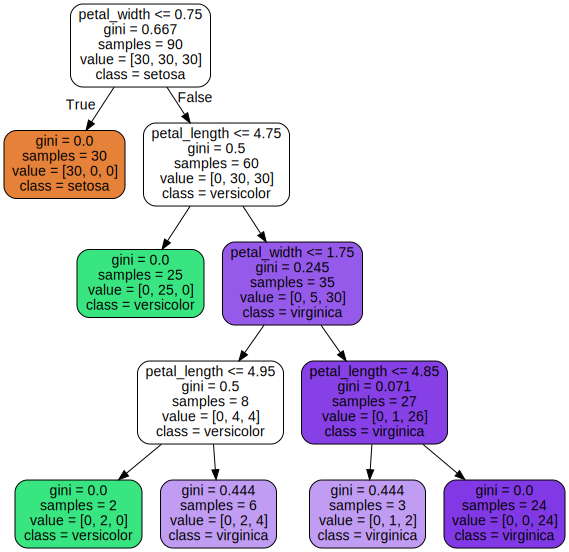

In [4]:
#画决策树
import graphviz


feature_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
class_name = iris.target_names

dot_data = tree.export_graphviz(clf
                               ,feature_names = feature_name
                               ,class_names = class_name
                               ,filled = True
                               ,rounded = True
                               )
graph = graphviz.Source(dot_data)
graph

### 绘制 ROC_curve

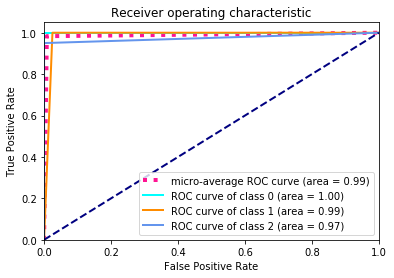

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#将标签二值化
y_test =  label_binarize(y_test,classes=[0,1,2])
#模型预测
y_score = clf.predict_proba(x_test)

#计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

#计算总的ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#画图
lw = 2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 绘制 learning_curve

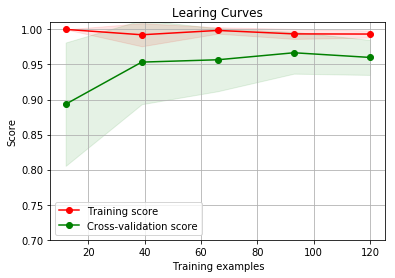

In [6]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#设置分类器
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#计算得到画图所需数据
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, Y, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#画图
plt.figure()
plt.title("Learing Curves")
plt.ylim(0.7,1.01)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


### 绘制 validation_curve

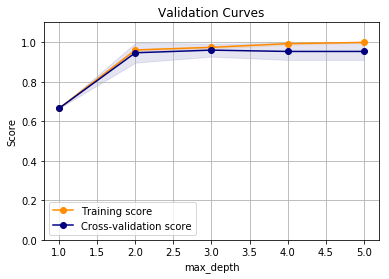

In [22]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5]
train_scores , test_scores = validation_curve(
          tree.DecisionTreeClassifier(random_state=1),X,Y,param_name="max_depth",param_range=param_range,
          cv=10,scoring="accuracy",n_jobs=1)

train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Validation Curves")
plt.ylim(0.0,1.1)
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.grid()

plt.plot(param_range, train_scores_mean, 'o-', color="darkorange",
         label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color="navy",
         label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="navy")

plt.legend(loc="best")
plt.show()
